In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [27]:
df = pd.read_csv("..//dataset//processed//final_dataset.csv")
df

,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density
0,2015,1,1,0,8852.0,27913.0,2.307,-0.895,1.275
1,2015,1,1,1,9054.0,27913.0,2.347,-0.971,1.276
2,2015,1,1,2,9070.0,27913.0,2.394,-1.041,1.276
3,2015,1,1,3,9163.0,27913.0,2.396,-1.097,1.277
4,2015,1,1,4,9231.0,27913.0,2.420,-1.153,1.277
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,8875.0,50452.0,1.808,0.751,1.265
43820,2019,12,31,20,7652.0,50452.0,1.828,0.651,1.267
43821,2019,12,31,21,7283.0,50452.0,1.850,0.501,1.269
43822,2019,12,31,22,6573.0,50452.0,1.814,0.297,1.270


In [28]:
df['lag_1'] = df['DE_wind_generation_actual'].shift(1)
df['lag_2'] = df['DE_wind_generation_actual'].shift(2)
df['lag_3'] = df['DE_wind_generation_actual'].shift(3)

train_df = df[df['year']<=2018].copy().dropna()
test_df = df[df['year']>2018].copy()
test_df.dropna(inplace=True)

In [29]:
# train_df = train_df.drop(columns=['lag_1'], inplace= True)
train_df

,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density,lag_1,lag_2,lag_3
3,2015,1,1,3,9163.0,27913.0,2.396,-1.097,1.277,9070.0,9054.0,8852.0
4,2015,1,1,4,9231.0,27913.0,2.420,-1.153,1.277,9163.0,9070.0,9054.0
5,2015,1,1,5,9689.0,27913.0,2.405,-1.234,1.277,9231.0,9163.0,9070.0
6,2015,1,1,6,10331.0,27913.0,2.425,-1.397,1.278,9689.0,9231.0,9163.0
7,2015,1,1,7,10208.0,27913.0,2.515,-1.564,1.279,10331.0,9689.0,9231.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018,12,31,19,17587.0,48974.0,2.415,4.623,1.246,16438.0,14597.0,12781.0
35060,2018,12,31,20,18871.0,48974.0,2.654,4.705,1.246,17587.0,16438.0,14597.0
35061,2018,12,31,21,20270.0,48974.0,2.854,4.741,1.245,18871.0,17587.0,16438.0
35062,2018,12,31,22,21405.0,48974.0,3.036,4.718,1.245,20270.0,18871.0,17587.0


In [30]:
features = ['DE_wind_capacity', 'DE_wind_speed', 'DE_temperature', 'DE_air_density','lag_1','lag_2','lag_3']
target = 'DE_wind_generation_actual'

In [31]:
X_train,y_train = train_df[features], train_df[target]
X_test,y_test = test_df[features],test_df[target]

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = XGBRegressor(objective="reg:squarederror", n_estimators=185, learning_rate=0.03, early_stopping_rounds=10)
model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],  # <- Only use validation data
    verbose=True
)
print("fitted xgb")


[0]	validation_0-rmse:10291.55563
[1]	validation_0-rmse:9990.70413
[2]	validation_0-rmse:9697.04481
[3]	validation_0-rmse:9412.12524
[4]	validation_0-rmse:9135.98682
[5]	validation_0-rmse:8869.86521
[6]	validation_0-rmse:8609.96171
[7]	validation_0-rmse:8357.76622
[8]	validation_0-rmse:8113.26972
[9]	validation_0-rmse:7876.17110
[10]	validation_0-rmse:7646.34881
[11]	validation_0-rmse:7423.39135
[12]	validation_0-rmse:7206.96737
[13]	validation_0-rmse:6997.50439
[14]	validation_0-rmse:6794.22270


[15]	validation_0-rmse:6598.40107
[16]	validation_0-rmse:6406.95901
[17]	validation_0-rmse:6221.41167
[18]	validation_0-rmse:6041.64879
[19]	validation_0-rmse:5867.29734
[20]	validation_0-rmse:5698.35725
[21]	validation_0-rmse:5534.52357
[22]	validation_0-rmse:5375.76289
[23]	validation_0-rmse:5221.87496
[24]	validation_0-rmse:5072.60605
[25]	validation_0-rmse:4927.81854
[26]	validation_0-rmse:4787.72182
[27]	validation_0-rmse:4651.52413
[28]	validation_0-rmse:4519.88064
[29]	validation_0-rmse:4392.28263
[30]	validation_0-rmse:4269.34290
[31]	validation_0-rmse:4149.55941
[32]	validation_0-rmse:4033.15088
[33]	validation_0-rmse:3920.30249
[34]	validation_0-rmse:3811.17747
[35]	validation_0-rmse:3705.10890
[36]	validation_0-rmse:3602.94400
[37]	validation_0-rmse:3503.84632
[38]	validation_0-rmse:3406.01737
[39]	validation_0-rmse:3311.59971
[40]	validation_0-rmse:3221.36859
[41]	validation_0-rmse:3131.37082
[42]	validation_0-rmse:3043.99747
[43]	validation_0-rmse:2959.41733
[44]	validatio

In [34]:

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = model.score(X_test_scaled, y_test)


if train rmse smaller than test rmse we can have some overfitting

In [35]:
print(r2)
print(rmse)
print(mae)
model.get_params

0.9931659230849894
820.7929719884098
566.3870394911396


<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=185,
             n_jobs=None, num_parallel_tree=None, ...)>

## normal model , default params

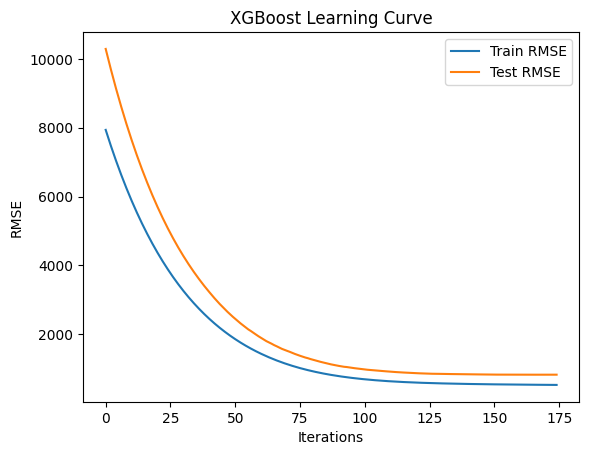

In [36]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results = model.evals_result()
epochs = len(results["validation_0"]["rmse"])

plt.plot(range(epochs), results["validation_0"]["rmse"], label="Train RMSE")
plt.plot(range(epochs), results["validation_1"]["rmse"], label="Test RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.legend()
plt.title("XGBoost Learning Curve")
plt.show()


C:\Users\ursal\AppData\Local\Temp\ipykernel_53824\1782917950.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette="viridis")


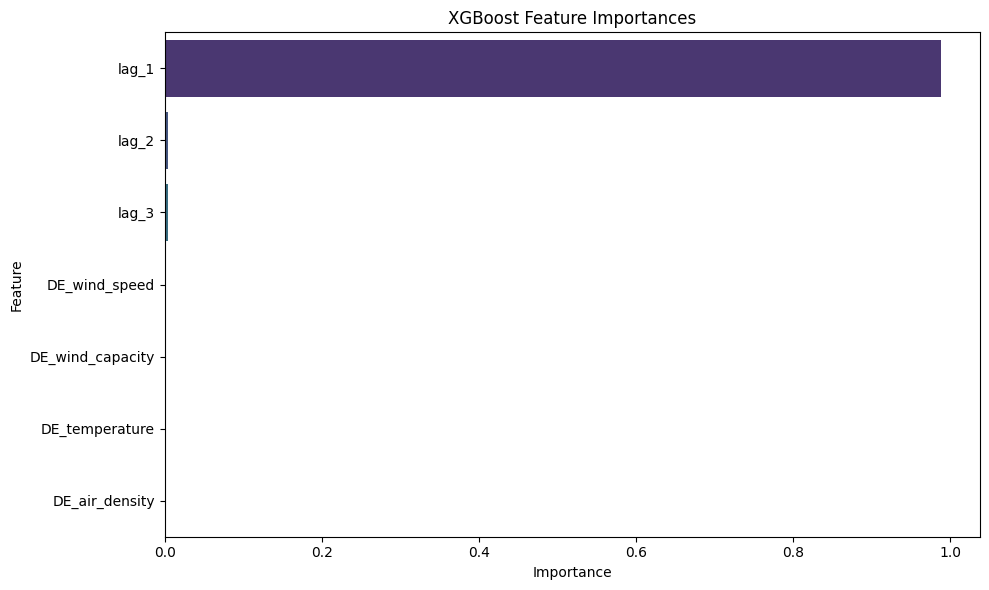

[7.2249636e-04 1.2085846e-03 6.8230077e-04 6.3283386e-04 9.8847693e-01
 4.3721255e-03 3.9047780e-03]


In [37]:
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette="viridis")
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

print(importances)

## randomized search cv params model

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# xgb1 = XGBRegressor(objective='reg:squarederror', verbosity=0)

# param_dist = {
#     'learning_rate': [0.01, 0.03, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3],
#     'subsample': [0.6, 0.8],
#     'colsample_bytree': [0.6, 0.8],
#     'n_estimators': [100, 200, 300],
#     'gamma': [0, 0.1],
#     'reg_lambda': [0.1, 1],
#     'reg_alpha': [0, 0.1]
# }

# random_search = RandomizedSearchCV(
#     estimator=xgb1,
#     param_distributions=param_dist,
#     n_iter=20,  # Try 20 random combos
#     scoring='neg_mean_squared_error',
#     n_jobs=4,
#     cv=3,
#     verbose=1,
#     random_state=42
# )

# random_search.fit(X_train, y_train)
# print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# y_pred = random_search.predict(X_test)

# mse2 = mean_squared_error(y_test, y_pred)
# mae2 = mean_absolute_error(y_test,y_pred)

# rmse2 = np.sqrt(mse2)  # Root Mean Squared Error

# # Compute R² Score
# r22 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse2:.4f}")
# print(f"Mean Absolute Error (MSE): {mae2:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
# print(f"R² Score: {r22:.4f}")

Mean Squared Error (MSE): 25074208.8082
Mean Absolute Error (MSE): 3923.3370
Root Mean Squared Error (RMSE): 5007.4154
R² Score: 0.7456


c:\Users\ursal\Desktop\notebooks_licenta\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


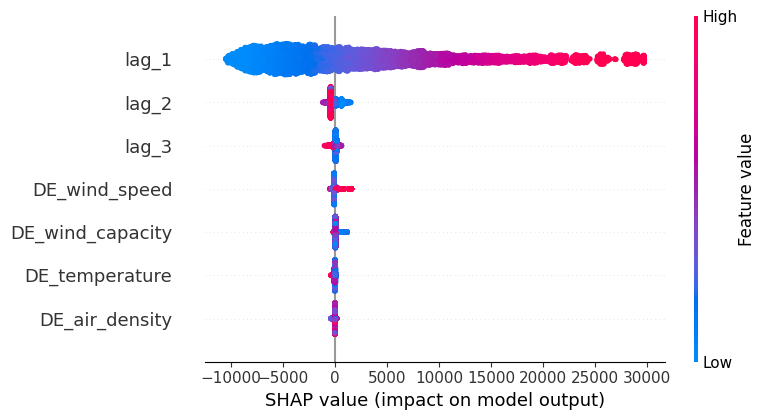

In [39]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


# grid search too long time

In [15]:
# xgb1 = XGBRegressor(objective = 'reg:squarederror', verbosity = 0)
# parameters = { #when use hyperthread, xgboost may become slower
#                 'learning_rate': [0.01, 0.03, 0.05, 0.1],  # Lower values for better generalization
#                 'max_depth': [3, 5, 7, 9],  # Avoid too deep trees
#                 'min_child_weight': [1, 3, 5],  # Regularization effect
#                 'subsample': [0.6, 0.8, 1.0],  # Try different data fractions
#                 'colsample_bytree': [0.6, 0.8, 1.0],  # Feature sampling
#                 'n_estimators': [100, 300, 500],  # More estimators for better results
#                 'gamma': [0, 0.1, 0.2],  # Controls tree pruning
#                 'reg_lambda': [0.1, 1, 10],  # L2 regularization
#                 'reg_alpha': [0, 0.1, 1]  # L1 regularization
# }

# xgb_grid = GridSearchCV(estimator=xgb1,
#                         param_grid = parameters,
#                         cv = 2,
#                         n_jobs = 4,
#                         verbose=True,
#                         scoring='neg_mean_squared_error'
#                         )

# xgb_grid.fit(X_train_scaled, y_train)
# print("fitted xgb")

# y_pred = xgb_grid.predict(X_test_scaled)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = xgb_grid.score(X_test_scaled, y_test)


In [40]:
test_df['predicted_wind_generation'] = model.predict(X_test)

In [41]:
subset = test_df[(test_df['year'] == 2019) &
                 (test_df['month'] == 1) &
                 (test_df['day'] >=1) & (test_df['day']<=8)]

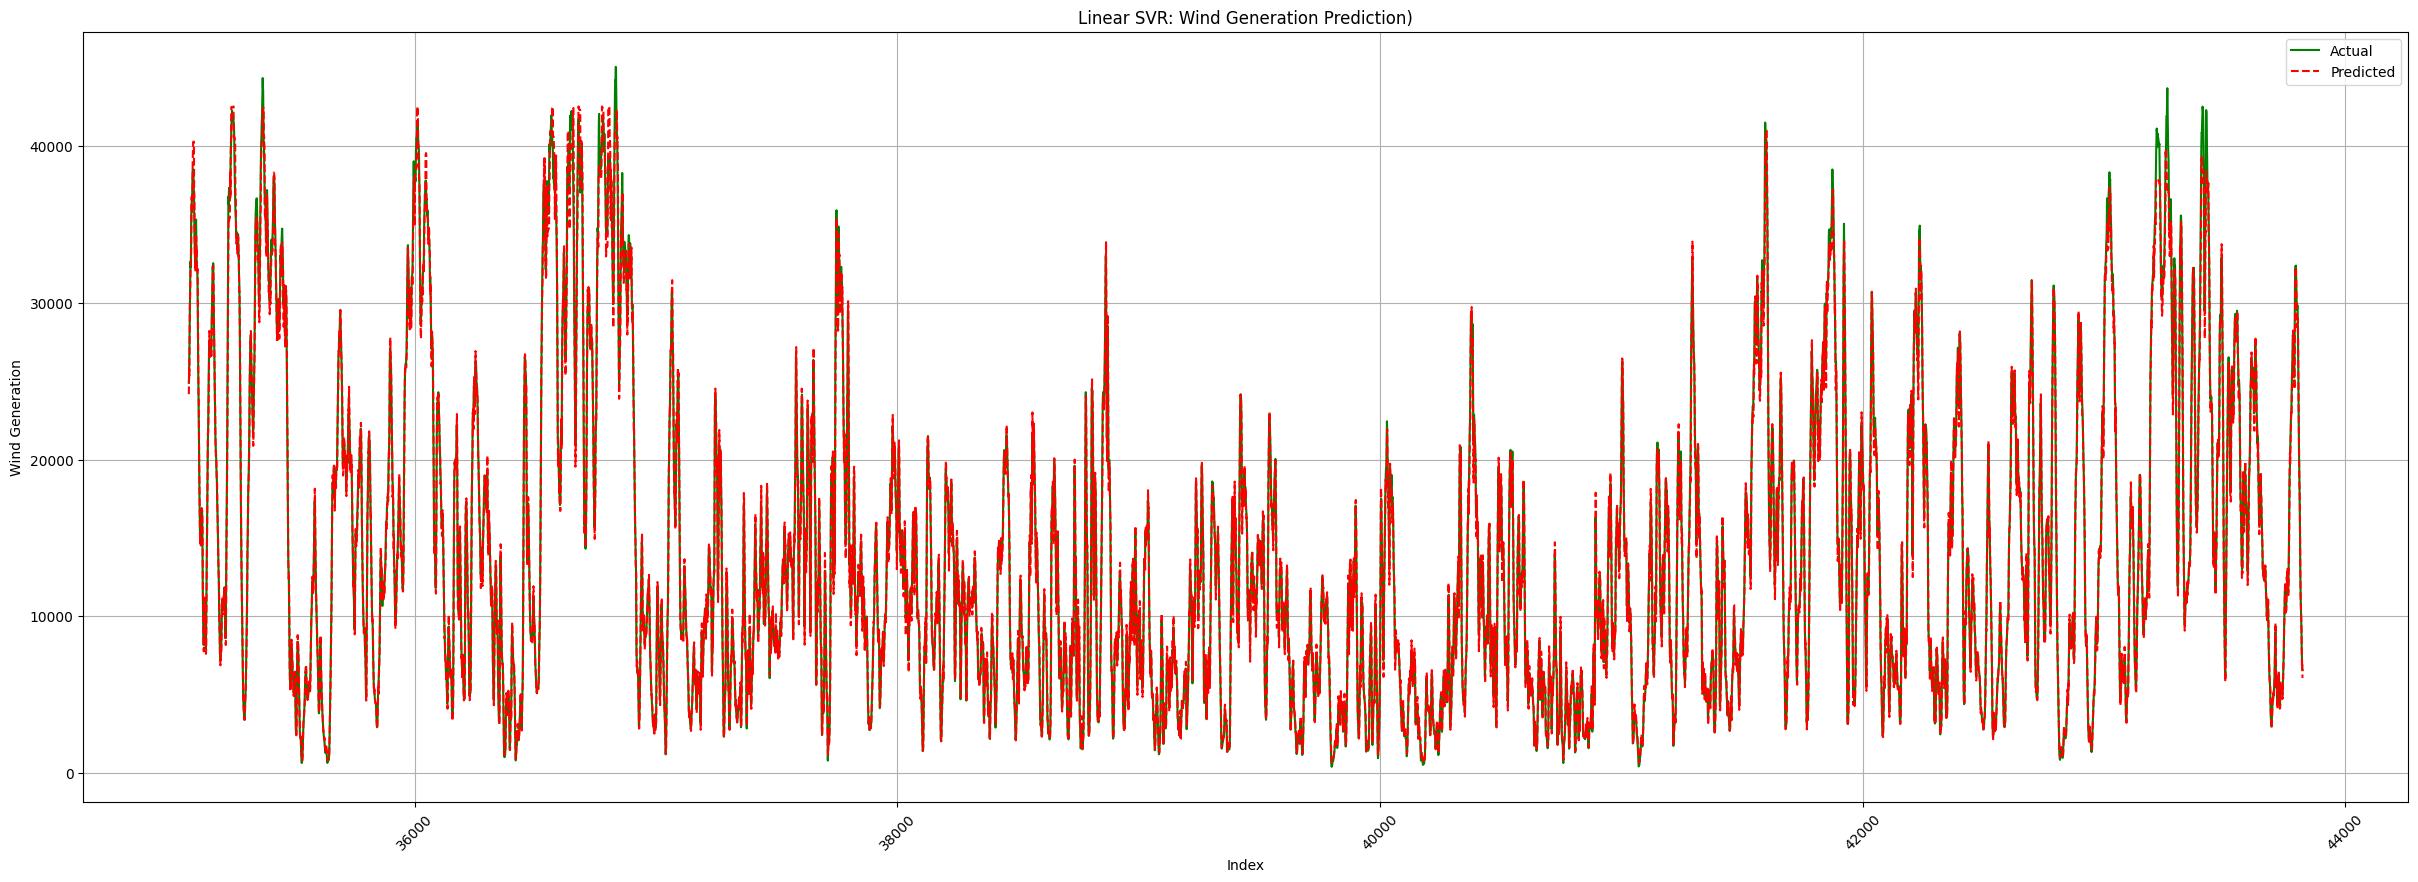

In [42]:
plt.figure(figsize=(30, 10))
plt.plot(test_df.index, test_df['DE_wind_generation_actual'], label="Actual", color="green")
plt.plot(test_df.index, test_df['predicted_wind_generation'], label="Predicted", color="red", linestyle="dashed")
plt.title('Linear SVR: Wind Generation Prediction)')
plt.xlabel('Index')
plt.ylabel('Wind Generation')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

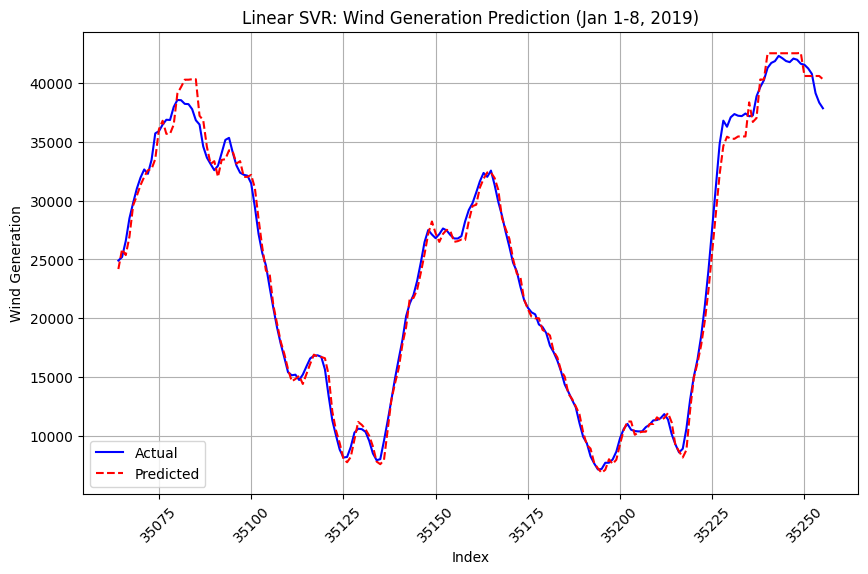

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(subset.index, subset['DE_wind_generation_actual'], label="Actual", color="blue")
plt.plot(subset.index, subset['predicted_wind_generation'], label="Predicted", color="red", linestyle="dashed")
plt.title('Linear SVR: Wind Generation Prediction (Jan 1-8, 2019)')
plt.xlabel('Index')
plt.ylabel('Wind Generation')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()